# Cross Validation and the LASSO
## Foundations of Machine Learning
## `! git clone https://www.github.com/DS3001/regularization`

## Downsides of Linear Models
- Last lecture, we looked at the horns of a dilemma of linear model-fitting:
  - Omitted Variables Bias: Leave out relevant variables, and the others will receive more weight in the regression to compensate, biasing the coefficient estimates and possibly the predictions
  - Multi-Colinearity/Bad Control: Put in too many correlated variables, and the model will deliver poor coefficient estimates and bad predictions
- This is a specific version of the *bias-variance trade-off*: Expected prediction error is the sum of the bias squared plus the predictor variance plus irreducible error
- This is very frustrating: You want a rich, interesting model, but striking a balance through trial-and-error is not science and often leads to selection bias and over-fitting
- **What is a modern, data driven way to resolve these issues, just like how ensembling can "fix" decision trees?**

## The Bias-Variance Tradeoff
- The basics of the bias-variance tradeoff is:
\begin{eqnarray*}
\underbrace{\mathbb{E}_{D,\varepsilon}[(y-\hat{f}(x,D))^2]}_{\text{Expected prediction error}} &=& 
\underbrace{(f(x)-\mathbb{E}_{D}[\hat{f}(x,D)])^2}_{\text{Bias squared}}\\
&& +\underbrace{\mathbb{E}_{D}[(\hat{f}(x,D)-\mathbb{E}_D[\hat{f}(x,D)])^2]}_{\text{Predictor Variance}}\\
&& + \underbrace{\sigma^2}_{\text{Irreducible Error}}
\end{eqnarray*}
- Unbiased prediction is nice, but not sufficient or necessary for good prediction: Predictor variance also plays an important role

## Example: Polynomial Approximation
- Let's view the bias-variance trade-off through the lens of an example
- Consider the model
$$
y_i = \sin(x_i)x_i + \varepsilon_i
$$
- Why this function? It makes an aesthetically pleasing, obviously non-linear shape. Please do not get hung up on the $\sin(x)x$. 
- It cannot be precisely fit with a linear model, even if we removed the noise $\varepsilon_i$, but in principle we can approximate it as closely as we want by using powers of $x_i$, like $x_i, x_i^2, x_i^3, ...$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(112)

N = 1000
se_eps = 2
mean_x = 7
se_x = 2

# Create x:
x = np.random.default_rng().normal(mean_x, se_x, N).T # Generate x's
eps = np.random.default_rng().normal(0, se_eps, N).T # Generate shocks

# Create y:
y_actual = np.sin(x)*x
y = y_actual + eps

# Store in dataframe:
df = pd.DataFrame({'y':y,'x':x,'intercept':np.ones(N),'y_actual':y_actual})
df = df.sort_values('x')
df.head()

,y,x,intercept,y_actual
490,1.695880,0.976284,1.0,0.808776
16,3.242432,1.225007,1.0,1.152497
502,1.048464,1.316715,1.0,1.274442
217,6.821197,1.581244,1.0,1.581157
571,-0.629801,1.618720,1.0,1.616861


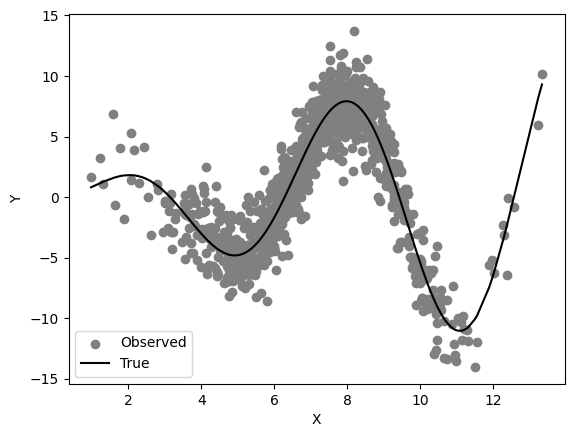

In [2]:
plt.scatter(df['x'],df['y'], label='Observed',color='grey')
plt.plot(df['x'],df['y_actual'], label ='True',color='black')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc='lower left')
plt.show()

Degree:  1 , Rsq:  0.02508708037330365 , RMSE:  5.2381062164489345


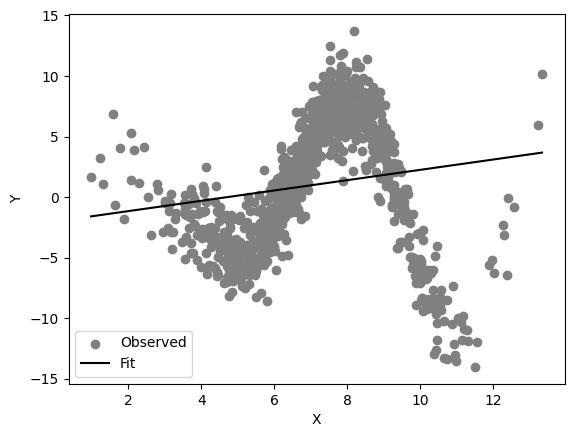



Degree:  2 , Rsq:  0.2114361655672785 , RMSE:  4.710964325023204


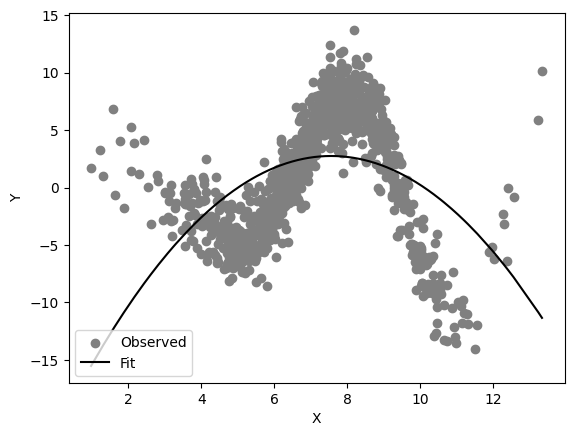



Degree:  3 , Rsq:  0.34503295959603897 , RMSE:  4.293397614506795


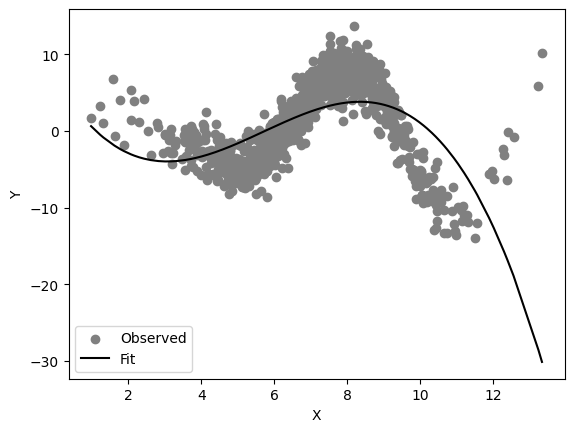



Degree:  4 , Rsq:  0.5734523530765299 , RMSE:  3.464776004669988


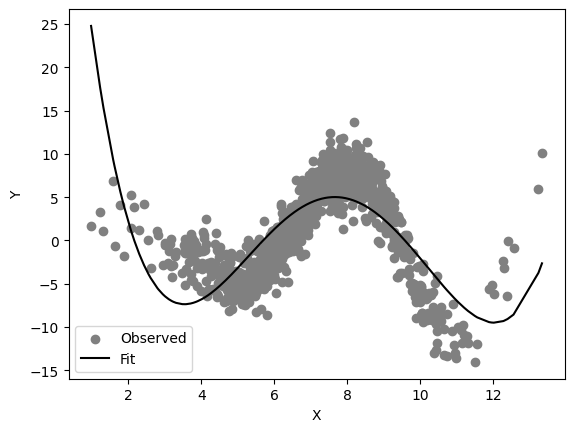



Degree:  5 , Rsq:  0.7957473737423477 , RMSE:  2.397591622481668


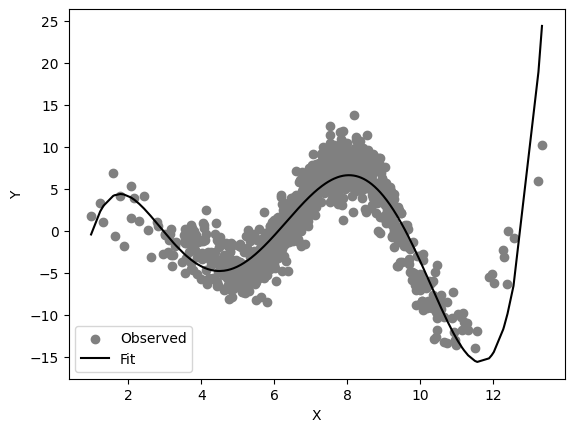



Degree:  6 , Rsq:  0.8148835239262359 , RMSE:  2.282516496201519


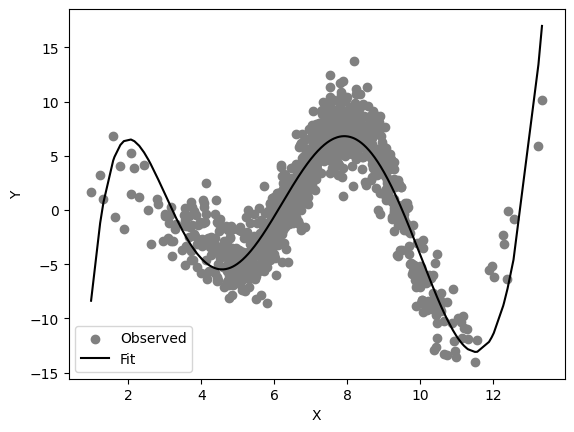



Degree:  7 , Rsq:  0.8634371469479027 , RMSE:  1.9604586134265074


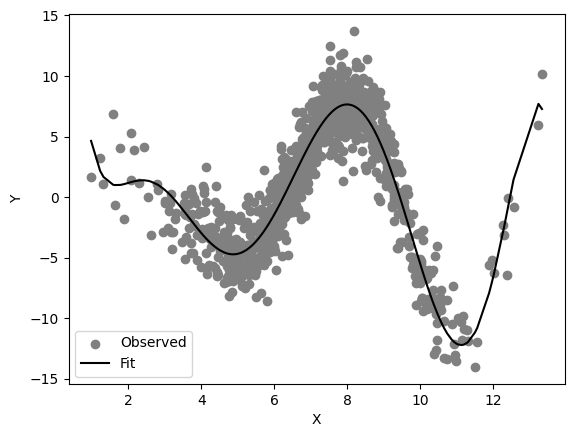



Degree:  8 , Rsq:  0.8634374303579677 , RMSE:  1.9604565791471307


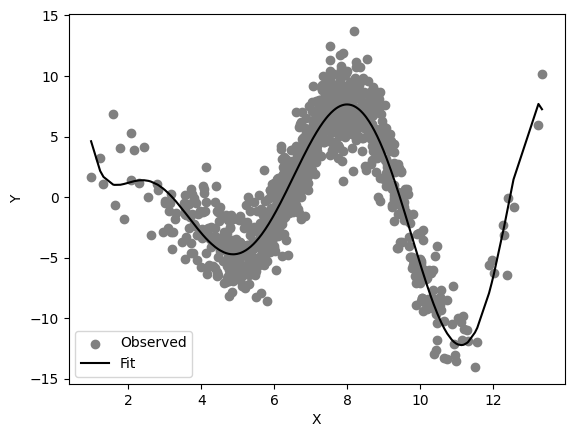



Degree:  9 , Rsq:  0.8671011444725009 , RMSE:  1.933980132266576


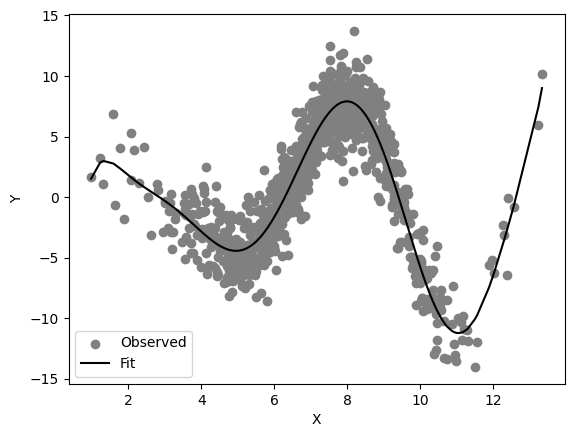

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression # Import linear regression model

X = df.loc[:,['x','intercept'] ] 
y = df.loc[:,['y'] ]

for d in np.arange(1,10):
    expander = PolynomialFeatures(degree=d,include_bias=False)
    #
    # Expand variables:
    Z = expander.fit_transform(X)
    names = expander.get_feature_names_out() # Get the names of these variables
    #
    # Regression:
    reg = LinearRegression(fit_intercept=False).fit(Z,y) # Run regression
    y_hat = reg.predict(Z)
    rmse = np.sqrt( np.mean( (y - y_hat)**2 ))
    print('Degree: ', d, ', Rsq: ', reg.score(Z,y), ', RMSE: ', rmse) # R2
    #
    # Plot:
    plt.scatter(X['x'],y, label='Observed',color='grey')
    plt.plot(X['x'],y_hat, label ='Fit',color='black')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend(loc='lower left')
    plt.show()
    print('\n')


## Nailed it: (?)

Rsq:  1.0 , RMSE:  0.0


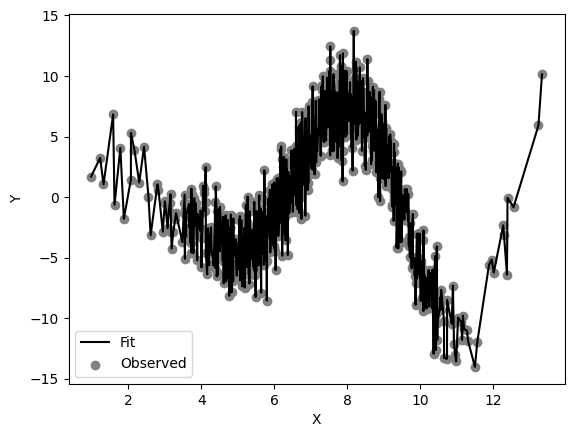

In [4]:
dummies = pd.get_dummies(X['x'],dtype=int)

# Regression:
reg = LinearRegression(fit_intercept=False).fit(dummies,y) # Run regression
y_hat = reg.predict(dummies)
rmse = np.sqrt( np.mean( (y - y_hat)**2 ))
print('Rsq: ', reg.score(dummies,y), ', RMSE: ', rmse) # R2

# Plot:
plt.plot(X['x'],y_hat, label ='Fit',color='black')
plt.scatter(X['x'],y, label='Observed',color='grey')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc='lower left')
plt.show()

## Comparison with True Values:

Degree:  1 , Rsq:  0.02508708037330365 , RMSE:  5.2381062164489345


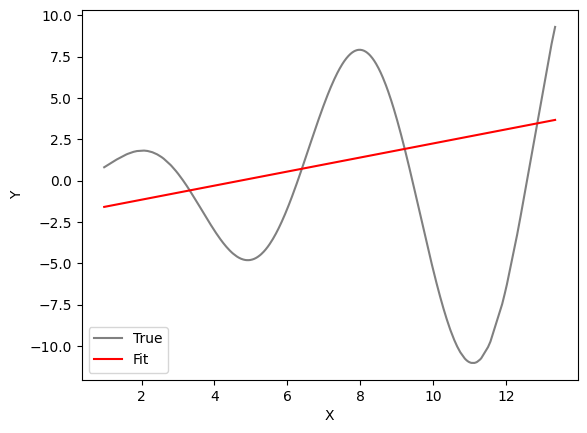



Degree:  4 , Rsq:  0.5734523530765299 , RMSE:  3.464776004669988


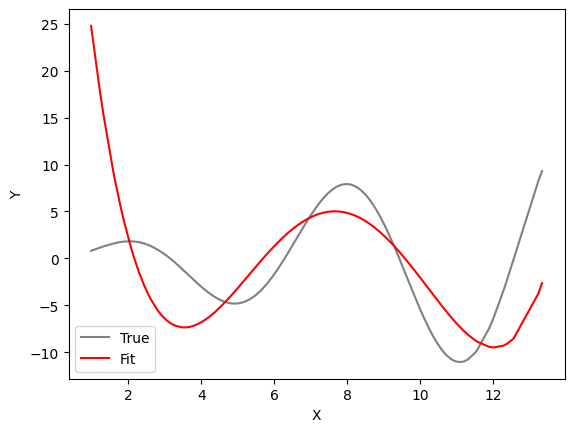



Degree:  7 , Rsq:  0.8634371469479027 , RMSE:  1.9604586134265074


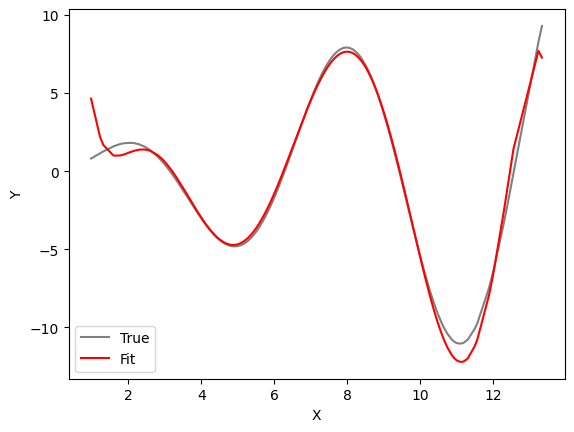



Degree:  10 , Rsq:  0.8672052524823841 , RMSE:  1.9332224798831437


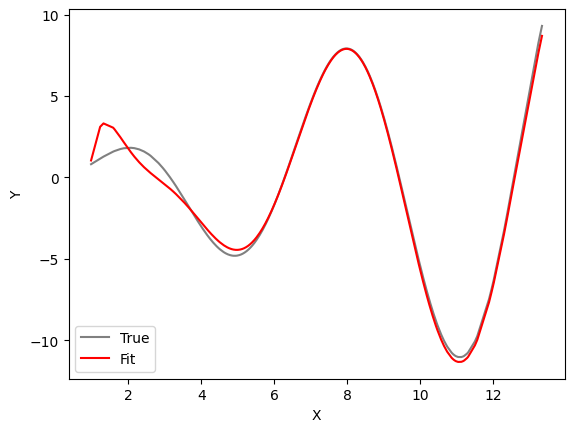



Degree:  13 , Rsq:  0.8675212011970495 , RMSE:  1.9309213237408551


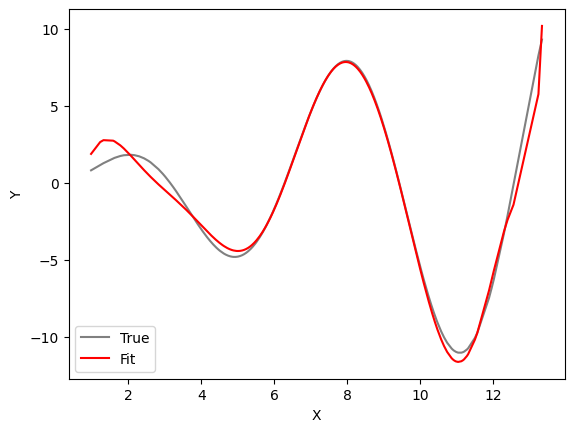



Degree:  16 , Rsq:  0.8643538966963177 , RMSE:  1.9538672296322814


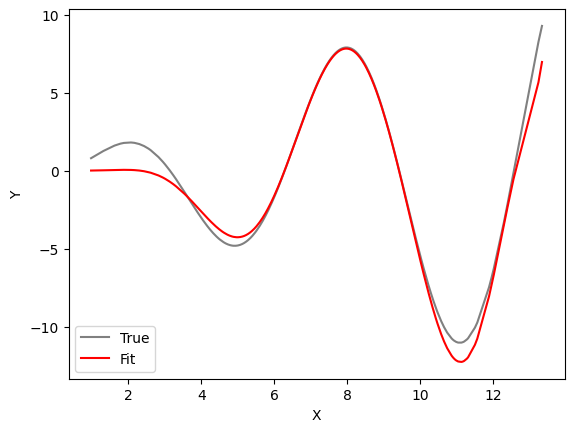



Degree:  19 , Rsq:  0.8564314399038429 , RMSE:  2.010115720769083


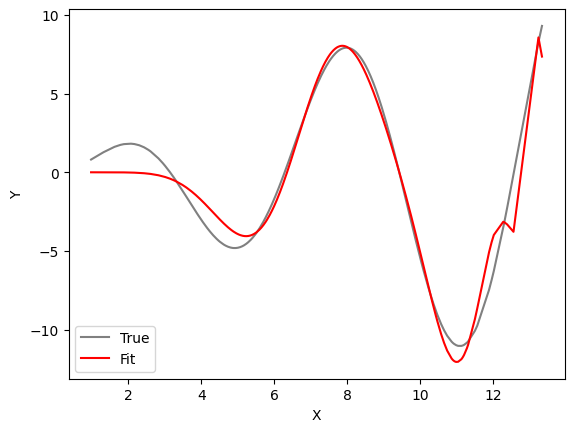



Degree:  22 , Rsq:  0.7394316434923239 , RMSE:  2.7080222270220027


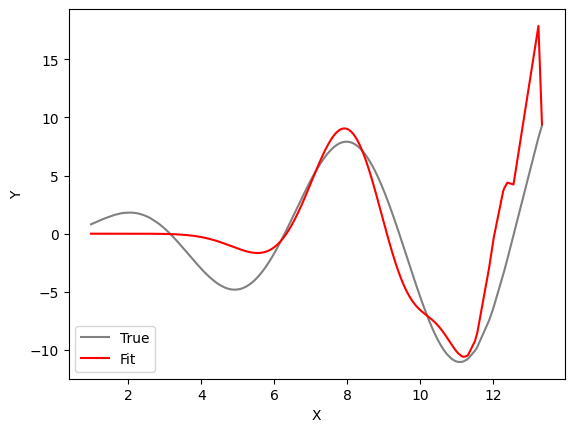

In [5]:
for d in np.arange(1,25,3):
    expander = PolynomialFeatures(degree=d,include_bias=False)
    #
    # Expand variables:
    Z = expander.fit_transform(X)
    names = expander.get_feature_names_out() # Get the names of these variables
    #
    # Regression:
    reg = LinearRegression(fit_intercept=False).fit(Z,y) # Run regression
    y_hat = reg.predict(Z)
    rmse = np.sqrt( np.mean( (y - y_hat)**2 ))
    print('Degree: ', d, ', Rsq: ', reg.score(Z,y), ', RMSE: ', rmse) # R2
    #
    # Plot:
    plt.plot(X['x'],df['y_actual'], label='True',color='grey')
    plt.plot(X['x'],y_hat, label ='Fit',color='red')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend(loc='lower left')
    plt.show()
    print('\n')

## Data Driven Model Selection
- Of course, if we did the train-test split, we'd see a bias-variance/overfitting-underfitting trade-off emerge
    - Too simple (too few powers of $x$), and you underfit, and the model does a poor job predicting
    - Too complex (too many powers of $x$), and you overfit, and the model does a poor job predicting
    - Math aside: There is a computational breakdown here as well as a statistical one: Solving for the OLS estimator becomes a numerically unstable calculation ($X$ is a **Vandermonde Matrix** and $X'X$ is **ill-conditioned**)
- But if you only make one split and test many models, you are going to start "overfitting on the test set", using that particular split's peculiar features that fail to generalize
- How do you responsibly test many models?

## Cross Validation
- We want to generalize the concept of the single training/test split that we've used repeatedly to discpline our model building
- The danger is that with one train/test split, you end up overfitting also on the test set by repeatedly adjusting the model and refitting on the training set
- To control this kind of error, we split the data into more than two chunks and use the chunks in thoughtful ways to discipline our model-building decisions
- You can think of this as a way of generalizing train/test splitting

## $k$-Fold Cross Validation
- Imagine you have a set of possible models, like the degree choice above
    1. Break the data into $k$ equally sized chunks, usually between 5 and 10
    2. Fit each model $k-1$ times, then compute its performance on the $k$-th chunk
    3. Average the performance measurements to get an expected performance measurement for the model
    4. Repeat this for all of the models under consideration, and pick the best model ($R^2$, RMSE, etc.)
- Note that since you are trying to pick a hyperparameter/complexity, we're trying to understand how the "expected fitted model" will perform; it is more like bootstrapping than it might initially appear (and "bootstrap validation" is an alternative to CV)

## $k$-Fold Cross Validation

![](crossvalidation.png)


## Example: Cross Validation
- We have $N=1000$, so taking $k=10$ means $1000/10 =100$ data points per fold
- Here's how this works:
    1. Pick a degree
    2. Fit the model on each of the $k-1$ folds and compute its $R^2$ or RMSE on the $k$-th test fold, cycling through $k$
    3. Average the performance on the test folds to get an overall metric for this degree
    4. Repeat steps 1-3 for each of the feasible degrees being considered

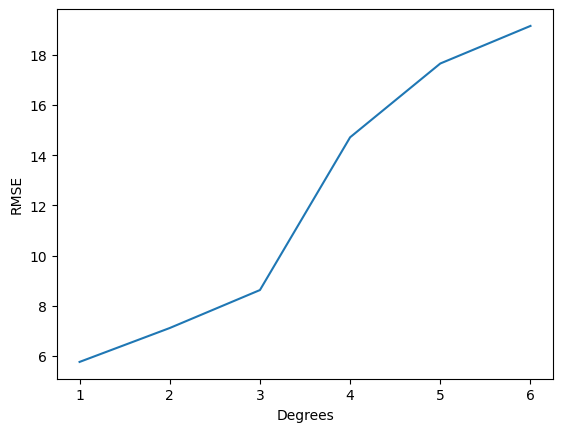

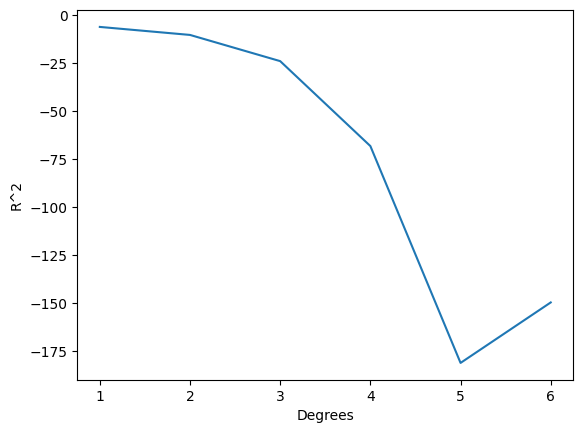

In [72]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error

k = 10
deg_max = 6
RMSE = np.zeros(deg_max)
R2 = np.zeros(deg_max)

# Cross validation:
for i in range(deg_max):
    # Expand variables:
    expander = PolynomialFeatures(degree=i+1,include_bias=False)
    Z = expander.fit_transform(X)
    #
    # Regression:
    reg = LinearRegression(fit_intercept=False)
    scores = cross_validate(reg, Z, y, 
                            cv = k,
                            scoring=['r2','neg_root_mean_squared_error'])
    # Get scores from CV:
    RMSE[i] = -np.mean(scores['test_neg_root_mean_squared_error'])
    R2[i] = np.mean(scores['test_r2'])

# RMSE
plt.plot(np.arange(1,deg_max+1),RMSE)
plt.xlabel("Degrees")
plt.ylabel("RMSE")
plt.show()
print('\n')

# R2
plt.plot(np.arange(1,deg_max+1),R2)
plt.xlabel("Degrees")
plt.ylabel("R^2")
plt.show()


## Leave One Out Cross Validation (LOOCV)
- So if you have $N$ observations and $K$ folds, you're training the models on 
$$
\dfrac{K-1}{K}N
$$
data points, and testing on $N/K$ data points
- If $K=N$, then you train the models on 
$$
\dfrac{N-1}{N}N = N-1$$
data points, and you get **Leave One Out Cross Validation** (LOOCV): You fit the model $N$ times on each of the $N$ folds where you throw away a single data point, then evaluate the model's performance on the $N$ points and average. This is the extreme of $k$-fold CV.
- It helps to think of it as: You are holding out a single observation for the trained model to test itself on, and then averaging across $N$ models that all got to make a one-shot prediction
- This becomes computationally expensive and has a higher variance compared to $k$-fold CV

## Model Selection with Linear Models
- Ensembling/bagging suggests Random Forests, which is a massive upgrade over CART
- Where does CV get prominently used to upgrade a model? Linear regression.
- For linear models, there's a similar upgrade, called the LASSO: Least Asymptotic Shrinkage and Selection Operator
- The goal is to use CV and a clever method of stepwise variable selection to pick the set of variables used
- What is the big idea?

## Regularized Regression and Shrinkage
- In a very mechanical sense, big coefficients mean more variation in predictions: Relatively small changes in a variable can result in relatively big changes in the prediction
- We want to say, "Stop it, control yourself, be serious"
- To force the model to make harder decisions about trade-offs between variables, we can impose constraints on how "large" the coefficients are allowed to be

## Regularized Regression and Shrinkage
- We give the linear regression a "budget constraint": The sum of the magnitudes of the coefficients cannot be greater than the constraint, $c$:
$$
|b_{1}|+|b_2|+...+|b_K| \le c
$$
- There are many versions of this concept, but this choice --- $|b_k| = \sqrt{b_k^2}$, rather than, say, $b_k^2$ --- is called the LASSO (Least Asymptotic Shrinkage and Selection Operator)

## Regularized Regression and Shrinkage
- This idea simultaneously comes from different traditions:
  - What happens when you have more variables than data points? (Regularization: ill-posed problems, big data)
  - What happens when your model exhibits bad control or you have lots of data but are unsure how to exploit it in the service of estimating some coefficients of interest? (Shrinkage: efficient estimation, bias-variance trade-off)
- The constraint forces the algorithm to make choices when there are "too many variables": Which variables reduce `SSE` the most? Which are the most correlated, and therefore least useful to add together?

## OLS Minimization
- OLS minimizes the `SSE`:

![](ols_minimization.png)

## The LASSO Constraint
- The new $b$ must be chosen inside the box:
  
![](lasso_constraint.png)

## The LASSO Regression
- The best $b$ inside the box is selected:

![](lasso_regression.png)

## Why LASSO is special [Math]
- Because of the form of the constraint, $\sum_{k=1}^K |b_k| \le c$, the LASSO will "zero out" a bunch of variables
- Even though, in principle, it could pick $|b_k|>0$ for many of the variables, it rarely does
- When LASSO zeroes out a variable, we can imagine that it "wasn't picked"
- Mathematically, this is because $|x|$ has a "kink" at zero, where the slope goes from -1 to 1, so the "budget set" for the LASSO has "corners." Because of this, the LASSO is very aggressive about throwing out variables, rather than a constraint like $x^2$ which would merely reduce the size of coefficients

## LASSO Mechanics
- In practice, you won't see the $c$ part of the constraint
- What you will see is typically called $\lambda$ (lambda), and the objective is actually
$$
\min_b \sum_{i=1}^N (y_i - b \cdot x_i)^2 + \lambda \sum_{k=1}^K |b_k|
$$
taking $\lambda$ as given, rather than impose the constraint and solve that literally
- In this framework, $\lambda$ is interpreted as the price of adjusting the coefficients. Likewise, $\lambda$ is the reduction in the `SSE(b)` that you would get by relaxing the constraint and increasing $c$ just a bit: It is called a **Lagrange Multiplier**.
- Key intuition: **As $\lambda$ goes up, increasing each $|b_k|$ becomes increasingly costly, penalizing "complex" explanations with large coefficients**
- "...where does cross validation come into this?" The coefficients are selected by 5-fold CV with the last fold used to predict SSE taking $\lambda$ as given  

## LASSO in `sklearn`
- Scikit has a Lasso module, but the inventors of the Lasso have a package called `glmnet` that is extremely well done
- Out of the box, `sklearn` performs the Lasso, but `glmnet` can be used to do a bunch of other things (including a LASSO logit/probit, survival analysis, and multinomial response models)
- The Lasso is in the `linear_model` module
    - `from sklearn import linear_model` imports the linear models module
    - `lasso = linear_model.Lasso(alpha=1.0)` creates a Lasso regression
    - `lasso.fit(X,y)` runs the regression
    - `lasso.coef_` returns the regression coefficients0.15...

## Example: Housing Price Regression
- 16,814 observations of 19 variables for house sales in Pierce County, NC
- Want to predict house price from characteristics ("hedonic pricing")

In [130]:
import pandas as pd

# Wrangle:
df = pd.read_csv('pierce_county_house_sales.csv')
df = df.drop(['sale_date'],axis=1)
df = df.drop(['view_quality'],axis=1)

df['waterfront_type'] = df['waterfront_type'].fillna('none')
df['age'] = max(df['year_built'])-df['year_built']
df = df.drop(['year_built'],axis=1)
df['price_log'] = np.log(df['sale_price'])

df['intercept']=np.ones(df.shape[0])

print(df.isna().sum())
df = df.dropna()
print(df.isna().sum())

df.head()

sale_price                     0
house_square_feet              0
attic_finished_square_feet     0
basement_square_feet           0
attached_garage_square_feet    0
detached_garage_square_feet    0
fireplaces                     0
hvac_description               7
exterior                       1
interior                       7
stories                        0
roof_cover                     8
bedrooms                       0
bathrooms                      0
waterfront_type                0
utility_sewer                  0
age                            0
price_log                      0
intercept                      0
dtype: int64
sale_price                     0
house_square_feet              0
attic_finished_square_feet     0
basement_square_feet           0
attached_garage_square_feet    0
detached_garage_square_feet    0
fireplaces                     0
hvac_description               0
exterior                       0
interior                       0
stories                       

,sale_price,house_square_feet,attic_finished_square_feet,basement_square_feet,attached_garage_square_feet,detached_garage_square_feet,fireplaces,hvac_description,exterior,interior,stories,roof_cover,bedrooms,bathrooms,waterfront_type,utility_sewer,age,price_log,intercept
0,380000,2157,0,0,528,0,0,Warm and Cool Air Zone,Frame Siding,Drywall,2,Composition Shingle,3,3,none,SEWER/SEPTIC INSTALLED,28,12.847927,1.0
1,383000,2238,0,0,396,0,0,Forced Air,Frame Siding,Drywall,2,Composition Shingle,4,3,none,SEWER/SEPTIC INSTALLED,4,12.855790,1.0
2,419900,1452,0,0,0,0,1,Forced Air,Frame Siding,Drywall,1,Built Up Rock,3,2,none,SEWER/SEPTIC INSTALLED,56,12.947772,1.0
3,251660,832,0,0,0,0,0,Forced Air,Frame Vinyl,Drywall,1,Composition Shingle,2,1,none,SEWER/SEPTIC INSTALLED,102,12.435834,1.0
4,500000,1780,0,384,484,0,1,Forced Air,Frame Siding,Drywall,1,Composition Shingle,3,2,none,SEWER/SEPTIC INSTALLED,66,13.122363,1.0


<Axes: >

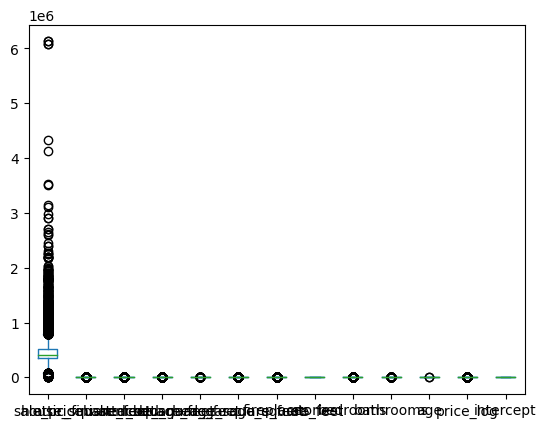

In [131]:
df.plot.box()

In [137]:
from sklearn import linear_model

# Target variable:
#y = df['price_log']
y = df['sale_price']

# Numeric:
var_num = ['house_square_feet', 'attic_finished_square_feet',
       'basement_square_feet', 'attached_garage_square_feet',
       'detached_garage_square_feet', 
       'age', 
      'bedrooms', 'bathrooms','stories']
X_num = df.loc[:,var_num]

# Dummies:
var_cat = [ 'hvac_description',
       'exterior', 'interior', 'roof_cover',
        'waterfront_type', 'utility_sewer','roof_cover']
dummies = pd.DataFrame([])
for var in var_cat: 
    new_dummies = pd.get_dummies( df.loc[:,var], dtype=int)
    dummies = pd.concat([dummies, new_dummies], axis=1) 

# Create covariates:
X = pd.concat([X_num, dummies],axis=1)

# Scale data:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaler.fit(X)
X_sc = scaler.transform(X)

# Run LASSO:
reg = linear_model.Lasso(alpha=1.0,
                         warm_start=True,
                         max_iter=2000,
                         fit_intercept=True)
reg.fit(X_sc,y)

sdf = pd.DataFrame({'variable': X.columns, 'slope':reg.coef_})
sdf

C:\Users\teren\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.675e+13, tolerance: 9.214e+10
  model = cd_fast.enet_coordinate_descent(


,variable,slope
0,house_square_feet,123925.367246
1,attic_finished_square_feet,15503.888105
2,basement_square_feet,48885.195451
3,attached_garage_square_feet,25147.836579
4,detached_garage_square_feet,9978.694443
5,age,6707.418978
6,bedrooms,-26032.971859
7,bathrooms,16412.206258
8,stories,-20508.661997
9,Electric,1556.604774


## Conclusion
- So now you have a bunch of tools:
  - $k$NN: Highly non-parametric, local prediction
  - $k$MC: Unsupervised learning algorithm for searching data for patterns
  - Linear Models: Optimally weight the explanatory variables
  - Decision Trees: Highly non-linear but fragile; highly interpretable
  - Ensemble Learning: Train and average sets of models to improve predictive performance and reduce prediction variance
  - Random Forests: Use ensemble learning and data-hiding to improve decision tree performance
  - LASSO: Data-driven variable selection for linear models
- Random Forests and LASSO are powerful: People really use these for serious work as benchmark tools for machine learning